In [1]:
# Importing all the necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
# Loading Dataset
data = pd.read_csv("creditcard.csv")
data.shape

(284807, 31)

In [3]:
# Printing Sample Data
print("Sample Data (first 5 rows):")
data.head()

Sample Data (first 5 rows):


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
print("Sample Data (last 5 rows):")
data.tail()

Sample Data (last 5 rows):


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
# Data Preprocessing
print("Missing values:", data.isnull().sum().any())
print("Class distribution:\n", data['Class'].value_counts())

# Features & Target
X = data.drop('Class', axis=1)
y = data['Class']

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Missing values: False
Class distribution:
 Class
0    284315
1       492
Name: count, dtype: int64


In [6]:
# Handling Imbalanced Data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)
print("After SMOTE:", y_resampled.value_counts())

After SMOTE: Class
0    284315
1    284315
Name: count, dtype: int64


In [7]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

In [8]:
# Training Models
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

In [9]:
# Random Forest
rf = RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [10]:
# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=100, max_depth=5, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

C:\Users\Nilanjana\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:30:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [11]:
# Evaluation Function
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n----- {model_name} -----")
    print(confusion_matrix(y_true, y_pred))
    print(classification_report(y_true, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_true, y_pred))

In [12]:
# Evaluate all models
evaluate_model(y_test, y_pred_lr, "Logistic Regression")


----- Logistic Regression -----
[[55434  1429]
 [ 4348 52515]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     56863
           1       0.97      0.92      0.95     56863

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726

ROC-AUC Score: 0.9492024690923798


In [13]:
evaluate_model(y_test, y_pred_rf, "Random Forest")


----- Random Forest -----
[[56756   107]
 [ 1202 55661]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     56863
           1       1.00      0.98      0.99     56863

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726

ROC-AUC Score: 0.9884898791833003


In [14]:
evaluate_model(y_test, y_pred_xgb, "XGBoost")


----- XGBoost -----
[[56804    59]
 [    0 56863]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

ROC-AUC Score: 0.9994812092221655


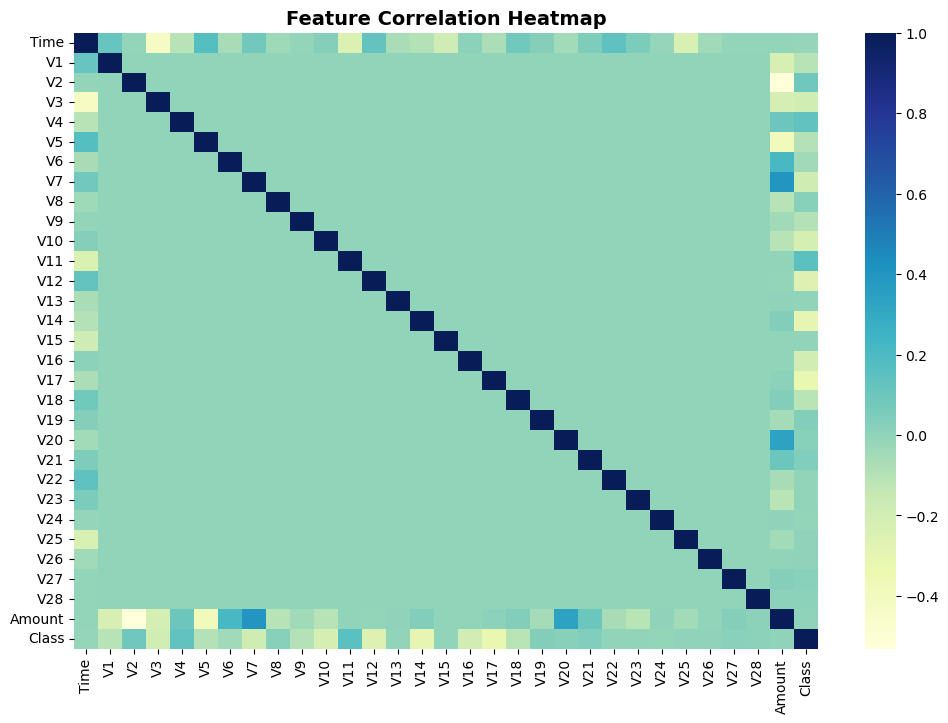

In [15]:
# Visualizations
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), cmap="YlGnBu", cbar=True)
plt.title("Feature Correlation Heatmap", fontsize=14, fontweight="bold")
plt.show()

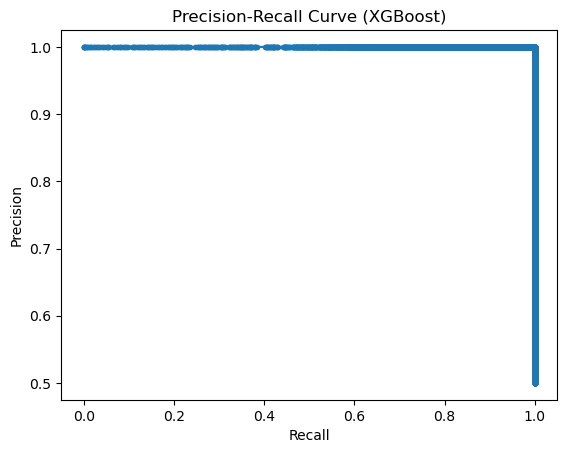

In [16]:
# Precision-Recall Curve for XGBoost
y_scores = xgb.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (XGBoost)')
plt.show()

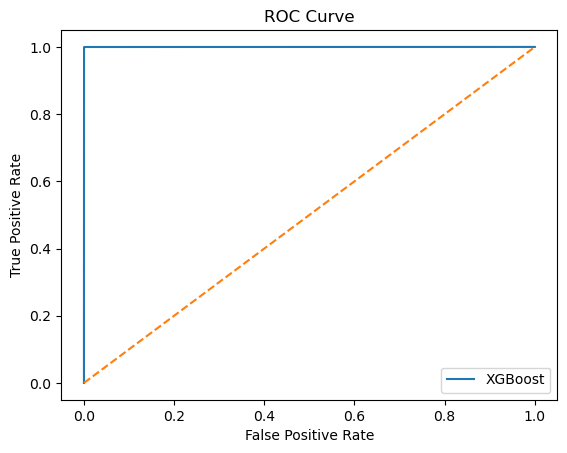

In [17]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_scores)
plt.plot(fpr, tpr, label="XGBoost")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [18]:
# Fraud vs Non-Fraud Visualization (PCA & t-SNE)
# Use original scaled data (not SMOTE) for visualization
X_vis = X_scaled
y_vis = y.values

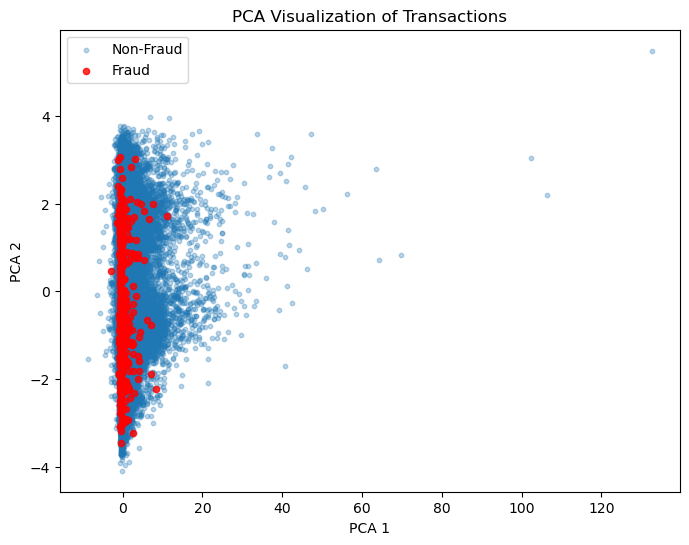

In [19]:
# ---- PCA ----
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_vis)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[y_vis==0,0], X_pca[y_vis==0,1], label="Non-Fraud", alpha=0.3, s=10)
plt.scatter(X_pca[y_vis==1,0], X_pca[y_vis==1,1], label="Fraud", alpha=0.8, s=20, color="red")
plt.title("PCA Visualization of Transactions")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()

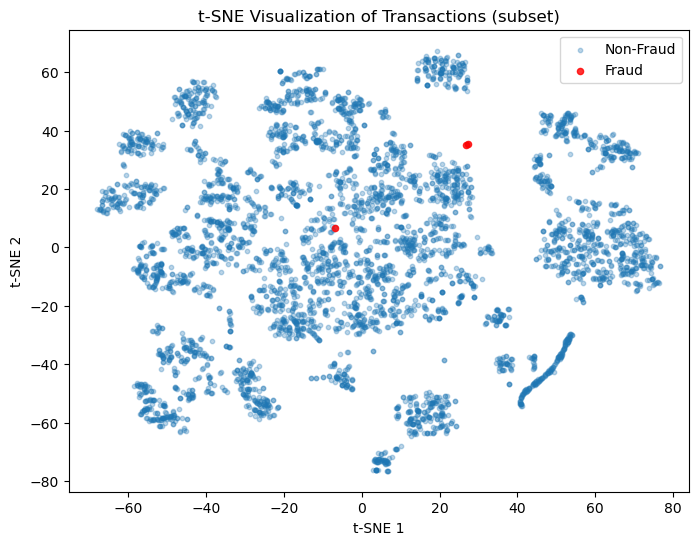

In [20]:
# ---- t-SNE ----
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_vis[:5000])   # subset for speed
y_tsne = y_vis[:5000]

plt.figure(figsize=(8,6))
plt.scatter(X_tsne[y_tsne==0,0], X_tsne[y_tsne==0,1], label="Non-Fraud", alpha=0.3, s=10)
plt.scatter(X_tsne[y_tsne==1,0], X_tsne[y_tsne==1,1], label="Fraud", alpha=0.8, s=20, color="red")
plt.title("t-SNE Visualization of Transactions (subset)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend()
plt.show()